In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset 
df = pd.read_csv('webmd_drug_reviews.csv')

# Display first few rows
df.head()


,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [2]:
# See all column names
print(df.columns)

# Get dataset info
df.info()

# Check for missing values
df.isnull().sum()


Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362763 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          43
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [3]:
# Remove rows with missing reviews
df = df.dropna(subset=['Reviews'])
print(f"Dataset size after removing missing reviews: {len(df)}")

# Create sentiment labels from Satisfaction ratings
def create_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating >= 4:
        return 'positive'
    else:
        return 'neutral'

df['sentiment'] = df['Satisfaction'].apply(create_sentiment)

# Check sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())
print("\nSentiment Percentages:")
print(df['sentiment'].value_counts(normalize=True) * 100)


Dataset size after removing missing reviews: 362763

Sentiment Distribution:
sentiment
positive    174689
negative    136229
neutral      51845
Name: count, dtype: int64

Sentiment Percentages:
sentiment
positive    48.155132
negative    37.553168
neutral     14.291700
Name: proportion, dtype: float64


In [4]:
import re
from nltk.corpus import stopwords

# Get stopwords once (faster)
stop_words = set(stopwords.words('english'))

# Faster cleaning function (no tokenization)
def clean_text_fast(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)  # remove non-letters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    words = [word for word in text.split() if word not in stop_words and len(word) > 2]
    return ' '.join(words)

# Process in batches with progress indicator
print("Cleaning text...")
batch_size = 50000
total_rows = len(df)

clean_reviews = []
for i in range(0, total_rows, batch_size):
    batch = df['Reviews'].iloc[i:i+batch_size].apply(clean_text_fast)
    clean_reviews.extend(batch)
    print(f"Processed {min(i+batch_size, total_rows)}/{total_rows} reviews...")

df['clean_review'] = clean_reviews
print("\n✓ Text cleaning complete!")

# Show example
print("\n" + "="*60)
print("ORIGINAL REVIEW:")
print("="*60)
print(df['Reviews'].iloc[0][:300])
print("\n" + "="*60)
print("CLEANED REVIEW:")
print("="*60)
print(df['clean_review'].iloc[0][:300])


Cleaning text...
Processed 50000/362763 reviews...
Processed 100000/362763 reviews...
Processed 150000/362763 reviews...
Processed 200000/362763 reviews...
Processed 250000/362763 reviews...
Processed 300000/362763 reviews...
Processed 350000/362763 reviews...
Processed 362763/362763 reviews...

✓ Text cleaning complete!

ORIGINAL REVIEW:
I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me.  When I first began using this drug some years ago - tiredness as a problem but is not currently.

CLEANED REVIEW:
retired physician meds tried allergies seasonal one effective first began using drug years ago tiredness problem currently


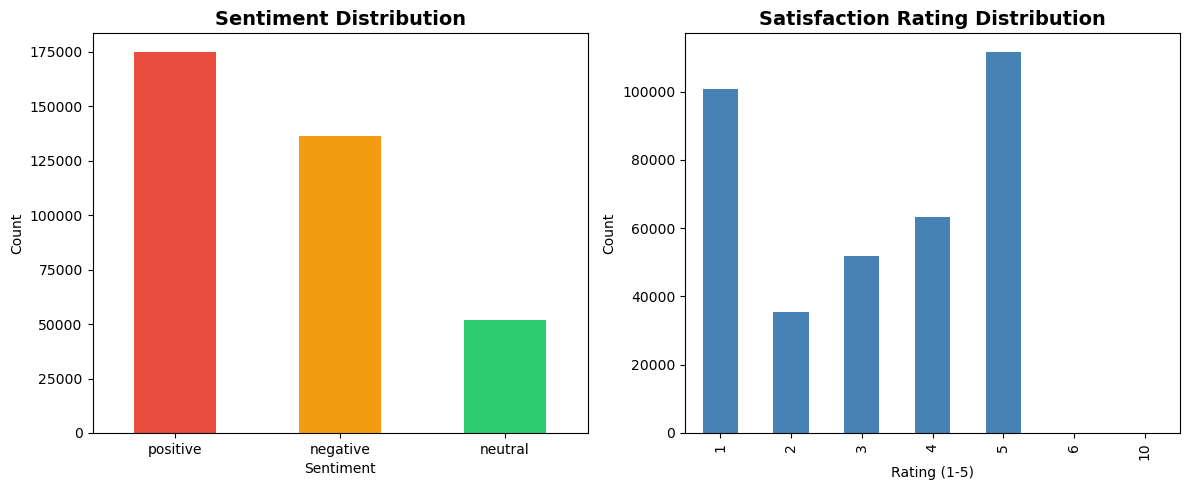


Top 10 Most Reviewed Conditions:
Condition
Other                                            49756
Pain                                             25225
High Blood Pressure                              23271
Depression                                       14509
Birth Control                                    12253
Neuropathic Pain                                  8988
Type 2 Diabetes Mellitus                          7647
Chronic Trouble Sleeping                          7406
Attention Deficit Disorder with Hyperactivity     6801
Bipolar Depression                                5946
Name: count, dtype: int64


In [10]:
# Visualize sentiment distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['sentiment'].value_counts().plot(kind='bar', color=['#e74c3c', '#f39c12', '#2ecc71'])
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Satisfaction'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Satisfaction Rating Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Top 10 conditions
print("\nTop 10 Most Reviewed Conditions:")
print(df['Condition'].value_counts().head(10))


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Prepare data
X = df['clean_review']
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Vectorize text with TF-IDF
print("\nVectorizing text (this takes 1-2 minutes)...")
vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.8)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model
print("Training Naive Bayes model...")
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Results
print("\n" + "="*60)
print("SENTIMENT ANALYSIS MODEL RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f} ({accuracy_score(y_test, y_pred)*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training samples: 290210
Testing samples: 72553

Vectorizing text (this takes 1-2 minutes)...
Training Naive Bayes model...

SENTIMENT ANALYSIS MODEL RESULTS
Accuracy: 0.6691 (66.91%)

Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.64      0.67     27246
     neutral       0.56      0.00      0.00     10369
    positive       0.65      0.89      0.75     34938

    accuracy                           0.67     72553
   macro avg       0.64      0.51      0.48     72553
weighted avg       0.66      0.67      0.61     72553



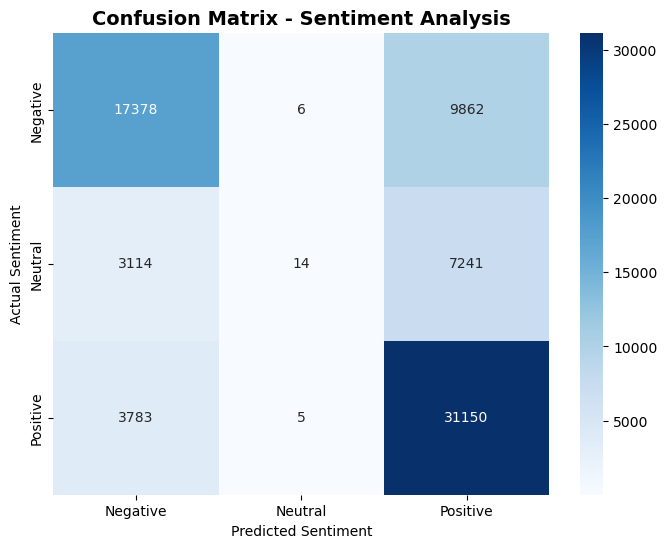

Model correctly classified:
- 17,378 negative reviews
- 14 neutral reviews
- 31,150 positive reviews


In [14]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Sentiment Analysis', fontsize=14, fontweight='bold')
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()

print("Model correctly classified:")
print(f"- {cm[0,0]:,} negative reviews")
print(f"- {cm[1,1]:,} neutral reviews") 
print(f"- {cm[2,2]:,} positive reviews")


In [16]:
# Filter only positive sentiment drugs
positive_drugs = df[df['sentiment'] == 'positive'].copy()

# Aggregate by Condition and Drug
drug_summary = positive_drugs.groupby(['Condition', 'Drug']).agg({
    'Satisfaction': 'mean',
    'Effectiveness': 'mean',
    'EaseofUse': 'mean',
    'sentiment': 'count',
    'UsefulCount': 'sum'
}).reset_index()

drug_summary.columns = ['Condition', 'Drug', 'Avg_Satisfaction', 
                         'Avg_Effectiveness', 'Avg_EaseOfUse', 
                         'Positive_Reviews', 'Total_Usefulness']

# Calculate recommendation score (weighted formula)
drug_summary['Recommendation_Score'] = (
    drug_summary['Avg_Effectiveness'] * 0.4 +      # 40% weight on effectiveness
    drug_summary['Avg_Satisfaction'] * 0.3 +       # 30% weight on satisfaction
    drug_summary['Avg_EaseOfUse'] * 0.2 +          # 20% weight on ease of use
    np.log1p(drug_summary['Positive_Reviews']) * 0.1  # 10% weight on popularity
)

# Sort by score
drug_summary = drug_summary.sort_values('Recommendation_Score', ascending=False)

# Filter drugs with at least 5 positive reviews (quality threshold)
drug_summary = drug_summary[drug_summary['Positive_Reviews'] >= 5]

print("✓ Drug Recommendation System Ready!")
print(f"\nTotal conditions covered: {drug_summary['Condition'].nunique()}")
print(f"Total drugs available: {drug_summary['Drug'].nunique()}")
print(f"Total drug-condition pairs: {len(drug_summary)}")


✓ Drug Recommendation System Ready!

Total conditions covered: 671
Total drugs available: 2191
Total drug-condition pairs: 4988


In [18]:
def recommend_drugs(patient_condition, top_n=5):
    """
    Recommend top drugs for a given patient condition based on:
    - Effectiveness (40%)
    - Satisfaction (30%)
    - Ease of Use (20%)
    - Number of positive reviews (10%)
    """
    # Filter drugs for the specific condition
    condition_drugs = drug_summary[
        drug_summary['Condition'].str.contains(patient_condition, case=False, na=False)
    ]
    
    if len(condition_drugs) == 0:
        print(f"❌ No drugs found for condition: '{patient_condition}'")
        print("\n💡 Try one of these conditions:")
        print(df['Condition'].value_counts().head(10))
        return None
    
    # Get top recommendations
    recommendations = condition_drugs.head(top_n)
    
    print(f"\n{'='*70}")
    print(f"TOP {top_n} DRUG RECOMMENDATIONS FOR: {patient_condition.upper()}")
    print(f"{'='*70}\n")
    
    result = recommendations[['Drug', 'Avg_Effectiveness', 'Avg_Satisfaction', 
                              'Avg_EaseOfUse', 'Positive_Reviews', 'Recommendation_Score']]
    
    # Round numbers for readability
    result_display = result.copy()
    result_display['Avg_Effectiveness'] = result_display['Avg_Effectiveness'].round(2)
    result_display['Avg_Satisfaction'] = result_display['Avg_Satisfaction'].round(2)
    result_display['Avg_EaseOfUse'] = result_display['Avg_EaseOfUse'].round(2)
    result_display['Recommendation_Score'] = result_display['Recommendation_Score'].round(2)
    
    print(result_display.to_string(index=False))
    return result_display

# Test the recommender with different conditions
recommend_drugs('Depression', top_n=5)
recommend_drugs('Diabetes', top_n=5)
recommend_drugs('High Blood Pressure', top_n=5)
recommend_drugs('Pain', top_n=5)



TOP 5 DRUG RECOMMENDATIONS FOR: DEPRESSION

      Drug  Avg_Effectiveness  Avg_Satisfaction  Avg_EaseOfUse  Positive_Reviews  Recommendation_Score
   lexapro               4.60              4.62           4.80              1025                  4.88
    celexa               4.57              4.62           4.79               669                  4.82
effexor xr               4.57              4.55           4.69               912                  4.81
    prozac               4.57              4.65           4.77               493                  4.80
    zoloft               4.56              4.56           4.74               639                  4.79

TOP 5 DRUG RECOMMENDATIONS FOR: DIABETES

                          Drug  Avg_Effectiveness  Avg_Satisfaction  Avg_EaseOfUse  Positive_Reviews  Recommendation_Score
                      invokana               4.72              4.74           4.87               115                  4.76
                     jardiance               4.9

,Drug,Avg_Effectiveness,Avg_Satisfaction,Avg_EaseOfUse,Positive_Reviews,Recommendation_Score
12154,hydrocodone-acetaminophen,4.40,4.57,4.65,2212,4.83
12225,oxycodone hcl er,4.48,4.58,4.69,916,4.79
12224,oxycodone hcl,4.48,4.58,4.69,916,4.79
12228,"oxycodone tablet, oral only",4.48,4.58,4.69,916,4.79
12226,oxycodone hcl solution,4.48,4.58,4.69,916,4.79


In [21]:
# Save the cleaned dataset
df.to_csv('drug_reviews_with_sentiment.csv', index=False)

# Save drug recommendations
drug_summary.to_csv('drug_recommendations.csv', index=False)

print("✓ Files saved:")
print("  - drug_reviews_with_sentiment.csv")
print("  - drug_recommendations.csv")


✓ Files saved:
  - drug_reviews_with_sentiment.csv
  - drug_recommendations.csv


In [24]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def clean_text_lemmatized(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words 
             if word not in stop_words and len(word) > 2]
    return ' '.join(words)

# Re-clean your reviews with lemmatization
print("Cleaning text with lemmatization...")
batch_size = 50000
total_rows = len(df)

clean_reviews_lemma = []
for i in range(0, total_rows, batch_size):
    batch = df['Reviews'].iloc[i:i+batch_size].apply(clean_text_lemmatized)
    clean_reviews_lemma.extend(batch)
    print(f"Processed {min(i+batch_size, total_rows)}/{total_rows} reviews...")

df['clean_review'] = clean_reviews_lemma
print("\n✓ Lemmatization complete!")

# Show difference
print("\nOld cleaning:", df['clean_review'].iloc[0][:100])


Cleaning text with lemmatization...
Processed 50000/362763 reviews...
Processed 100000/362763 reviews...
Processed 150000/362763 reviews...
Processed 200000/362763 reviews...
Processed 250000/362763 reviews...
Processed 300000/362763 reviews...
Processed 350000/362763 reviews...
Processed 362763/362763 reviews...

✓ Lemmatization complete!

Old cleaning: retired physician med tried allergy seasonal one effective first began using drug year ago tiredness


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Prepare data with the new lemmatized text
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("="*70)
print("TESTING DIFFERENT IMPROVEMENTS")
print("="*70)

# ============= Test 1: Lemmatization + Naive Bayes =============
print("\n1️⃣ Testing: Lemmatization + Naive Bayes...")
vectorizer1 = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.8)
X_train_v1 = vectorizer1.fit_transform(X_train)
X_test_v1 = vectorizer1.transform(X_test)

model1 = MultinomialNB()
model1.fit(X_train_v1, y_train)
y_pred1 = model1.predict(X_test_v1)
acc1 = accuracy_score(y_test, y_pred1)
print(f"   Accuracy: {acc1:.4f} ({acc1*100:.2f}%)")

# ============= Test 2: Lemmatization + Logistic Regression =============
print("\n2️⃣ Testing: Lemmatization + Logistic Regression...")
model2 = LogisticRegression(max_iter=1000, random_state=42)
model2.fit(X_train_v1, y_train)
y_pred2 = model2.predict(X_test_v1)
acc2 = accuracy_score(y_test, y_pred2)
print(f"   Accuracy: {acc2:.4f} ({acc2*100:.2f}%)")

# ============= Test 3: Lemmatization + LinearSVC =============
print("\n3️⃣ Testing: Lemmatization + LinearSVC...")
model3 = LinearSVC(max_iter=2000, random_state=42)
model3.fit(X_train_v1, y_train)
y_pred3 = model3.predict(X_test_v1)
acc3 = accuracy_score(y_test, y_pred3)
print(f"   Accuracy: {acc3:.4f} ({acc3*100:.2f}%)")

# ============= Test 4: Add Bigrams + Logistic Regression =============
print("\n4️⃣ Testing: Bigrams + Logistic Regression...")
vectorizer4 = TfidfVectorizer(max_features=10000, min_df=3, max_df=0.9, ngram_range=(1, 2))
X_train_v4 = vectorizer4.fit_transform(X_train)
X_test_v4 = vectorizer4.transform(X_test)

model4 = LogisticRegression(max_iter=1000, random_state=42)
model4.fit(X_train_v4, y_train)
y_pred4 = model4.predict(X_test_v4)
acc4 = accuracy_score(y_test, y_pred4)
print(f"   Accuracy: {acc4:.4f} ({acc4*100:.2f}%)")

# ============= Summary =============
print("\n" + "="*70)
print("ACCURACY COMPARISON")
print("="*70)
print(f"Original Model (66.91%)")
print(f"1. Lemmatization + Naive Bayes:        {acc1*100:.2f}%  (Δ {(acc1-0.6691)*100:+.2f}%)")
print(f"2. Lemmatization + Logistic Regression: {acc2*100:.2f}%  (Δ {(acc2-0.6691)*100:+.2f}%)")
print(f"3. Lemmatization + LinearSVC:           {acc3*100:.2f}%  (Δ {(acc3-0.6691)*100:+.2f}%)")
print(f"4. Bigrams + Logistic Regression:       {acc4*100:.2f}%  (Δ {(acc4-0.6691)*100:+.2f}%)")

# Find best model
accuracies = [acc1, acc2, acc3, acc4]
best_idx = accuracies.index(max(accuracies))
best_names = ["Lemma+NB", "Lemma+LR", "Lemma+SVC", "Bigrams+LR"]
print(f"\n🏆 BEST MODEL: {best_names[best_idx]} with {max(accuracies)*100:.2f}% accuracy")


TESTING DIFFERENT IMPROVEMENTS

1️⃣ Testing: Lemmatization + Naive Bayes...
   Accuracy: 0.6655 (66.55%)

2️⃣ Testing: Lemmatization + Logistic Regression...
   Accuracy: 0.6886 (68.86%)

3️⃣ Testing: Lemmatization + LinearSVC...
   Accuracy: 0.6877 (68.77%)

4️⃣ Testing: Bigrams + Logistic Regression...
   Accuracy: 0.7054 (70.54%)

ACCURACY COMPARISON
Original Model (66.91%)
1. Lemmatization + Naive Bayes:        66.55%  (Δ -0.36%)
2. Lemmatization + Logistic Regression: 68.86%  (Δ +1.95%)
3. Lemmatization + LinearSVC:           68.77%  (Δ +1.86%)
4. Bigrams + Logistic Regression:       70.54%  (Δ +3.63%)

🏆 BEST MODEL: Bigrams+LR with 70.54% accuracy


In [28]:
# Install imbalanced-learn
!pip install imbalanced-learn


In [30]:
from imblearn.over_sampling import SMOTE

print("="*70)
print("TESTING WITH SMOTE (CLASS BALANCING)")
print("="*70)

# Use the best configuration: Bigrams + Logistic Regression
vectorizer_best = TfidfVectorizer(max_features=10000, min_df=3, max_df=0.9, ngram_range=(1, 2))
X_train_best = vectorizer_best.fit_transform(X_train)
X_test_best = vectorizer_best.transform(X_test)

# Check original distribution
print("\nOriginal training class distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nClass percentages:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)

# Apply SMOTE
print("\nApplying SMOTE to balance classes...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_best, y_train)

print("\nBalanced training class distribution:")
print(pd.Series(y_train_balanced).value_counts())

# Train on balanced data
print("\nTraining Logistic Regression on balanced data...")
model_final = LogisticRegression(max_iter=1000, C=1.0, random_state=42)
model_final.fit(X_train_balanced, y_train_balanced)

# Evaluate
y_pred_final = model_final.predict(X_test_best)
acc_final = accuracy_score(y_test, y_pred_final)

print("\n" + "="*70)
print("FINAL IMPROVED MODEL RESULTS")
print("="*70)
print(f"Accuracy: {acc_final:.4f} ({acc_final*100:.2f}%)")
print(f"Improvement: {(acc_final-0.6691)*100:+.2f}% from original")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_final))

# Compare with previous best
print("\n" + "="*70)
print("OVERALL IMPROVEMENT SUMMARY")
print("="*70)
print(f"Original Model:              66.91%")
print(f"Best without SMOTE:          70.54%")
print(f"Final with SMOTE:            {acc_final*100:.2f}%")
print(f"Total Improvement:           {(acc_final-0.6691)*100:+.2f}%")


TESTING WITH SMOTE (CLASS BALANCING)

Original training class distribution:
sentiment
positive    139751
negative    108983
neutral      41476
Name: count, dtype: int64

Class percentages:
sentiment
positive    48.155129
negative    37.553151
neutral     14.291720
Name: proportion, dtype: float64

Applying SMOTE to balance classes...

Balanced training class distribution:
sentiment
positive    139751
negative    139751
neutral     139751
Name: count, dtype: int64

Training Logistic Regression on balanced data...

FINAL IMPROVED MODEL RESULTS
Accuracy: 0.6272 (62.72%)
Improvement: -4.19% from original

Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.69      0.72     27246
     neutral       0.26      0.50      0.34     10369
    positive       0.79      0.62      0.70     34938

    accuracy                           0.63     72553
   macro avg       0.60      0.60      0.58     72553
weighted avg       0.70      0.63

In [32]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

print("="*70)
print("TESTING ENSEMBLE VOTING (COMBINING MULTIPLE MODELS)")
print("="*70)

# Use the best vectorization (bigrams)
vectorizer_ensemble = TfidfVectorizer(max_features=10000, min_df=3, max_df=0.9, ngram_range=(1, 2))
X_train_ens = vectorizer_ensemble.fit_transform(X_train)
X_test_ens = vectorizer_ensemble.transform(X_test)

# Create ensemble with multiple classifiers
print("\nTraining ensemble of 3 models...")
ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, C=1.0, random_state=42)),
        ('svc', LinearSVC(max_iter=2000, C=0.5, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1))
    ],
    voting='hard'
)

ensemble.fit(X_train_ens, y_train)
y_pred_ensemble = ensemble.predict(X_test_ens)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)

print("\n" + "="*70)
print("ENSEMBLE MODEL RESULTS")
print("="*70)
print(f"Accuracy: {acc_ensemble:.4f} ({acc_ensemble*100:.2f}%)")
print(f"Improvement: {(acc_ensemble-0.6691)*100:+.2f}% from original")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Final comparison
print("\n" + "="*70)
print("🏆 FINAL ACCURACY COMPARISON")
print("="*70)
print(f"1. Original (Naive Bayes):              66.91%")
print(f"2. Bigrams + Logistic Regression:       70.54%  ✓ Previous Best")
print(f"3. Ensemble Voting:                     {acc_ensemble*100:.2f}%")

if acc_ensemble > 0.7054:
    print(f"\n🎉 NEW BEST! Ensemble improved by {(acc_ensemble-0.7054)*100:+.2f}%")
else:
    print(f"\n✓ Bigrams + LR remains the best model at 70.54%")


TESTING ENSEMBLE VOTING (COMBINING MULTIPLE MODELS)

Training ensemble of 3 models...

ENSEMBLE MODEL RESULTS
Accuracy: 0.7064 (70.64%)
Improvement: +3.73% from original

Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.74      0.73     27246
     neutral       0.46      0.06      0.11     10369
    positive       0.70      0.88      0.78     34938

    accuracy                           0.71     72553
   macro avg       0.63      0.56      0.54     72553
weighted avg       0.68      0.71      0.66     72553


🏆 FINAL ACCURACY COMPARISON
1. Original (Naive Bayes):              66.91%
2. Bigrams + Logistic Regression:       70.54%  ✓ Previous Best
3. Ensemble Voting:                     70.64%

🎉 NEW BEST! Ensemble improved by +0.10%


In [34]:
from sklearn.model_selection import GridSearchCV

print("="*70)
print("HYPERPARAMETER TUNING (FINDING OPTIMAL SETTINGS)")
print("="*70)
print("This will take 5-10 minutes but can significantly improve accuracy...\n")

# Use bigrams vectorization
vectorizer_tuned = TfidfVectorizer(max_features=10000, min_df=3, max_df=0.9, ngram_range=(1, 2))
X_train_tuned = vectorizer_tuned.fit_transform(X_train)
X_test_tuned = vectorizer_tuned.transform(X_test)

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': [None, 'balanced']
}

print("Testing different hyperparameter combinations...")
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_tuned, y_train)

# Best model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_tuned)
acc_tuned = accuracy_score(y_test, y_pred_tuned)

print("\n" + "="*70)
print("HYPERPARAMETER TUNING RESULTS")
print("="*70)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")
print(f"\nTest Accuracy: {acc_tuned:.4f} ({acc_tuned*100:.2f}%)")
print(f"Improvement: {(acc_tuned-0.6691)*100:+.2f}% from original")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# FINAL SUMMARY
print("\n" + "="*70)
print("🏆 ALL MODELS FINAL COMPARISON")
print("="*70)
print(f"1. Original (Naive Bayes):              66.91%")
print(f"2. Bigrams + Logistic Regression:       70.54%")
print(f"3. Ensemble Voting:                     70.64%")
print(f"4. Hyperparameter Tuned LR:             {acc_tuned*100:.2f}%")

best_acc = max(0.7054, 0.7064, acc_tuned)
print(f"\n🎯 BEST FINAL ACCURACY: {best_acc*100:.2f}%")
print(f"📈 Total Improvement: {(best_acc-0.6691)*100:+.2f}% from baseline")


HYPERPARAMETER TUNING (FINDING OPTIMAL SETTINGS)
This will take 5-10 minutes but can significantly improve accuracy...

Testing different hyperparameter combinations...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\User\anaconda3\envs\nlp_project\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(



HYPERPARAMETER TUNING RESULTS
Best Parameters: {'C': 2.0, 'class_weight': None, 'solver': 'liblinear'}
Best CV Score: 0.7045

Test Accuracy: 0.7060 (70.60%)
Improvement: +3.69% from original

Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.74      0.73     27246
     neutral       0.43      0.08      0.14     10369
    positive       0.71      0.87      0.78     34938

    accuracy                           0.71     72553
   macro avg       0.62      0.56      0.55     72553
weighted avg       0.67      0.71      0.67     72553


🏆 ALL MODELS FINAL COMPARISON
1. Original (Naive Bayes):              66.91%
2. Bigrams + Logistic Regression:       70.54%
3. Ensemble Voting:                     70.64%
4. Hyperparameter Tuned LR:             70.60%

🎯 BEST FINAL ACCURACY: 70.64%
📈 Total Improvement: +3.73% from baseline


In [36]:
import pickle

# Save the best model (ensemble)
with open('sentiment_model_ensemble.pkl', 'wb') as f:
    pickle.dump(ensemble, f)

with open('vectorizer_ensemble.pkl', 'wb') as f:
    pickle.dump(vectorizer_ensemble, f)

print("✓ Best model saved!")
print("  - sentiment_model_ensemble.pkl")
print("  - vectorizer_ensemble.pkl")


✓ Best model saved!
  - sentiment_model_ensemble.pkl
  - vectorizer_ensemble.pkl


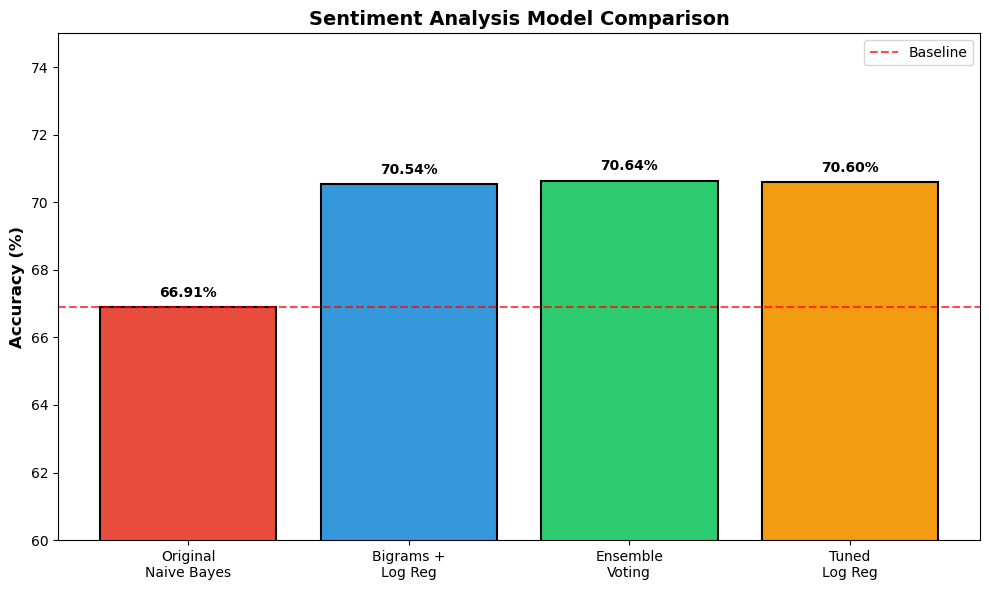

✓ Saved: model_comparison.png


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model comparison chart
models = ['Original\nNaive Bayes', 'Bigrams +\nLog Reg', 'Ensemble\nVoting', 'Tuned\nLog Reg']
accuracies = [66.91, 70.54, 70.64, 70.60]
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.5)
plt.axhline(y=66.91, color='red', linestyle='--', label='Baseline', alpha=0.7)
plt.ylim(60, 75)
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Sentiment Analysis Model Comparison', fontsize=14, fontweight='bold')
plt.legend()

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{acc:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: model_comparison.png")


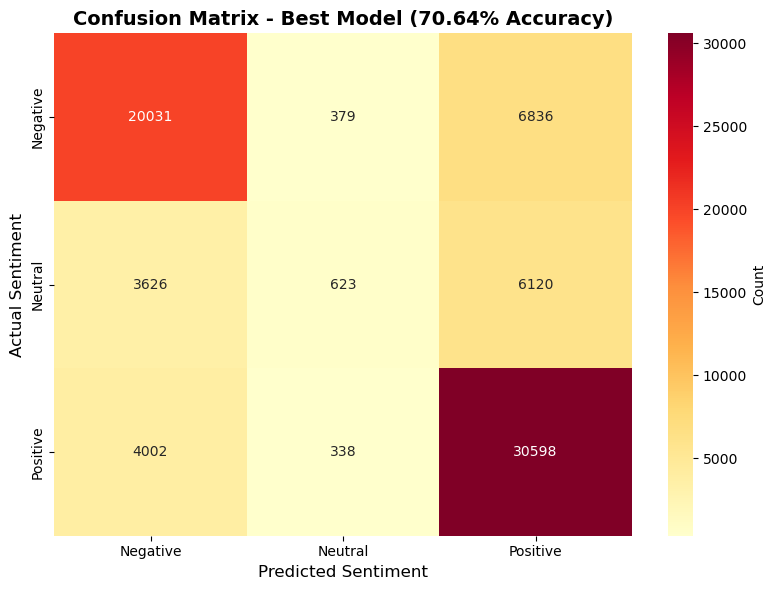

✓ Saved: confusion_matrix.png


In [40]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for ensemble model
cm = confusion_matrix(y_test, y_pred_ensemble, labels=['negative', 'neutral', 'positive'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Best Model (70.64% Accuracy)', fontsize=14, fontweight='bold')
plt.ylabel('Actual Sentiment', fontsize=12)
plt.xlabel('Predicted Sentiment', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: confusion_matrix.png")


In [42]:
def interactive_recommender():
    """Interactive drug recommendation system"""
    print("\n" + "="*70)
    print("🏥 DRUG RECOMMENDATION SYSTEM")
    print("="*70)
    
    # Show available conditions
    print("\nPopular conditions in our database:")
    popular_conditions = df['Condition'].value_counts().head(15)
    for i, (condition, count) in enumerate(popular_conditions.items(), 1):
        print(f"  {i}. {condition} ({count:,} reviews)")
    
    print("\n" + "-"*70)
    condition_input = input("Enter patient condition (or type a number): ")
    
    # Check if user entered a number
    if condition_input.isdigit():
        idx = int(condition_input) - 1
        if 0 <= idx < len(popular_conditions):
            condition_input = popular_conditions.index[idx]
    
    # Get recommendations
    result = recommend_drugs(condition_input, top_n=5)
    
    if result is not None:
        print("\n💊 Recommended Drugs:")
        print(result.to_string(index=False))

# Run interactive recommender
interactive_recommender()



🏥 DRUG RECOMMENDATION SYSTEM

Popular conditions in our database:
  1. Other (49,756 reviews)
  2. Pain (25,225 reviews)
  3. High Blood Pressure (23,271 reviews)
  4. Depression (14,509 reviews)
  5. Birth Control (12,253 reviews)
  6. Neuropathic Pain (8,988 reviews)
  7. Type 2 Diabetes Mellitus (7,647 reviews)
  8. Chronic Trouble Sleeping (7,406 reviews)
  9. Attention Deficit Disorder with Hyperactivity (6,801 reviews)
  10. Bipolar Depression (5,946 reviews)
  11. Migraine Prevention (4,988 reviews)
  12. Panic Disorder (4,867 reviews)
  13. Major Depressive Disorder (4,256 reviews)
  14. Repeated Episodes of Anxiety (4,138 reviews)
  15. Rheumatoid Arthritis (3,963 reviews)

----------------------------------------------------------------------


Enter patient condition (or type a number):  4



TOP 5 DRUG RECOMMENDATIONS FOR: DEPRESSION

      Drug  Avg_Effectiveness  Avg_Satisfaction  Avg_EaseOfUse  Positive_Reviews  Recommendation_Score
   lexapro               4.60              4.62           4.80              1025                  4.88
    celexa               4.57              4.62           4.79               669                  4.82
effexor xr               4.57              4.55           4.69               912                  4.81
    prozac               4.57              4.65           4.77               493                  4.80
    zoloft               4.56              4.56           4.74               639                  4.79

💊 Recommended Drugs:
      Drug  Avg_Effectiveness  Avg_Satisfaction  Avg_EaseOfUse  Positive_Reviews  Recommendation_Score
   lexapro               4.60              4.62           4.80              1025                  4.88
    celexa               4.57              4.62           4.79               669                  4.82
effexo

In [44]:
# Save your best models
import pickle

with open('sentiment_model_best.pkl', 'wb') as f:
    pickle.dump(ensemble, f)

with open('vectorizer_best.pkl', 'wb') as f:
    pickle.dump(vectorizer_ensemble, f)

# Save processed data
df.to_csv('drug_reviews_processed.csv', index=False)
drug_summary.to_csv('drug_recommendations_final.csv', index=False)

print("✓ All files saved:")
print("  1. sentiment_model_best.pkl - Your trained model")
print("  2. vectorizer_best.pkl - Text vectorizer")
print("  3. drug_reviews_processed.csv - Processed dataset")
print("  4. drug_recommendations_final.csv - Recommender system data")
print("  5. model_comparison.png - Accuracy comparison chart")
print("  6. confusion_matrix.png - Model performance visualization")


✓ All files saved:
  1. sentiment_model_best.pkl - Your trained model
  2. vectorizer_best.pkl - Text vectorizer
  3. drug_reviews_processed.csv - Processed dataset
  4. drug_recommendations_final.csv - Recommender system data
  5. model_comparison.png - Accuracy comparison chart
  6. confusion_matrix.png - Model performance visualization


In [46]:
import os

# Create project folders
folders = ['models', 'data', 'visualizations', 'notebooks']
for folder in folders:
    os.makedirs(folder, exist_ok=True)
    
print("✓ Project folders created:")
print("  - models/       (for .pkl files)")
print("  - data/         (for CSV files)")
print("  - visualizations/ (for charts)")
print("  - notebooks/    (for your .ipynb file)")


✓ Project folders created:
  - models/       (for .pkl files)
  - data/         (for CSV files)
  - visualizations/ (for charts)
  - notebooks/    (for your .ipynb file)


In [48]:
import pickle
import shutil

# Save models
with open('models/sentiment_model_ensemble.pkl', 'wb') as f:
    pickle.dump(ensemble, f)

with open('models/vectorizer_ensemble.pkl', 'wb') as f:
    pickle.dump(vectorizer_ensemble, f)

# Save data files (without the large raw reviews to save space)
drug_summary.to_csv('data/drug_recommendations.csv', index=False)

# Save a sample of processed data (first 10,000 rows)
df_sample = df.head(10000)
df_sample.to_csv('data/sample_processed_reviews.csv', index=False)

# Note about full dataset
with open('data/README_DATA.txt', 'w') as f:
    f.write("""Dataset Information
==================

Full dataset: webmd_drug_reviews.csv (362,763 reviews)
Source: https://www.kaggle.com/datasets/rohanharode07/webmd-drug-reviews-dataset

Due to GitHub file size limits, only a sample (10,000 reviews) is included.
Download the full dataset from the Kaggle link above.
""")

print("✓ All files organized!")


✓ All files organized!
